![image](https://app.lucidchart.com/publicSegments/view/104d6877-b1c0-4700-b91f-50aa1f7092e7/image.png)

In [1]:
import pandas as pd
pd.options.plotting.backend = "matplotlib"

In [2]:
eth_locked_df = pd.read_csv('raw_files/dai_weth.csv')
eth_locked_df.set_index(pd.to_datetime(eth_locked_df['__timestamp']).dt.date, 
                    verify_integrity=True,
                    inplace=True,
                   )
eth_locked_df.sort_index(inplace=True)
original_columns = list(eth_locked_df.columns)

eth_locked_df['Q(eth_locked)'] = eth_locked_df['Locked Amount']
eth_locked_df.drop(columns=original_columns, inplace=True)
eth_locked_df

,Q(eth_locked)
__timestamp,
2017-12-18,2425.662000
2017-12-19,6240.431314
2017-12-20,14183.070621
2017-12-21,15644.732690
2017-12-22,18830.844186
...,...
2020-05-08,216796.370398
2020-05-09,213554.344456
2020-05-10,211318.587678


In [3]:
dai_mints_burns = pd.read_csv('raw_files/dai_minted_burnt.csv')

dai_mints_burns.set_index(pd.to_datetime(dai_mints_burns['__timestamp']).dt.date, 
                    verify_integrity=True,
                    inplace=True,
                   )
dai_mints_burns.sort_index(inplace=True)
original_columns = list(dai_mints_burns.columns)
dai_mints_burns['u_3'] = dai_mints_burns['Minted DAI'].diff().fillna(dai_mints_burns['Minted DAI'])
dai_mints_burns['b_2 + u_4'] = dai_mints_burns['Burnt DAI'].diff().fillna(dai_mints_burns['Burnt DAI'])
dai_mints_burns.drop(columns=original_columns, inplace=True)
dai_mints_burns

,u_3,b_2 + u_4
__timestamp,,
2017-12-18,5.953420e+05,45.943840
2017-12-19,1.379832e+06,35394.482980
2017-12-20,2.676383e+06,502251.750000
2017-12-21,8.053550e+05,49782.711992
2017-12-22,3.145512e+05,747453.127687
...,...,...
2020-08-01,1.786804e+02,11524.007450
2020-08-02,1.091655e+04,10646.097875
2020-08-14,9.647781e+02,12898.813466


In [4]:
wipes_shuts = pd.read_json('raw_files/dune_data.json')
wipes_shuts.set_index(pd.to_datetime(wipes_shuts['date_trunc']).dt.date, 
                          verify_integrity=True,
                          inplace=True                          
                         )
original_columns = list(wipes_shuts.columns)
wipes_shuts['u_4'] = wipes_shuts['debt_payment']
wipes_shuts['v'] = wipes_shuts['usd_fee_paid']
wipes_shuts.drop(columns=original_columns, inplace=True)
wipes_shuts

,u_4,v
date_trunc,,
2017-12-18,1.000000e+01,0.000006
2017-12-19,3.536748e+04,0.455885
2017-12-20,5.014128e+05,0.178879
2017-12-21,4.978271e+04,1.158909
2017-12-22,7.239153e+05,19.756468
...,...,...
2019-09-26,1.515115e+06,64257.311824
2019-09-27,6.366783e+05,7214.430099
2019-09-28,1.452062e+05,492.589362


In [5]:
eth_price = pd.read_csv('raw_files/DAIETH_data.csv', usecols=['date','ETH Price', 'Stability Fee'])
eth_price.set_index(pd.to_datetime(eth_price['date']).dt.date, 
                    verify_integrity=True,
                    inplace=True,
                   )
eth_price.sort_index(inplace=True)
original_columns = list(eth_price.columns)
eth_price['rho_star(eth_price)'] = eth_price['ETH Price']
eth_price['beta(stability_fee)'] = eth_price['Stability Fee']
eth_price.drop(columns=original_columns, inplace=True)
eth_price

,rho_star(eth_price),beta(stability_fee)
date,,
2017-12-18,736.004090,0.5
2017-12-19,832.236972,0.5
2017-12-20,810.287507,0.5
2017-12-21,837.231080,0.5
2017-12-22,689.014990,0.5
...,...,...
2019-09-26,167.637314,12.5
2019-09-27,167.347085,12.5
2019-09-28,174.289775,12.5


In [6]:
debt_price_df = eth_price.join(eth_locked_df).join(dai_mints_burns).join(wipes_shuts)
debt_price_df['u_4'].fillna(0, inplace=True)
debt_price_df['v'].fillna(0, inplace=True)

In [7]:
debt_price_df['b_2'] = debt_price_df['b_2 + u_4'] - debt_price_df['u_4']
debt_price_df[debt_price_df['b_2']<-0.001]

,rho_star(eth_price),beta(stability_fee),Q(eth_locked),u_3,b_2 + u_4,u_4,v,b_2
date,,,,,,,,
2019-03-27,139.144023,7.5,2.174332e+06,1.322572e+05,3.076867e+05,3.077473e+05,1281.057348,-60.606091
2019-04-01,142.012896,7.5,2.171342e+06,7.478807e+05,3.881296e+05,3.882548e+05,777.946921,-125.156193
2019-04-02,152.791939,7.5,2.175015e+06,1.576052e+06,4.013269e+06,4.014125e+06,24861.857531,-855.980481
2019-04-04,161.092536,7.5,2.168093e+06,1.842784e+06,6.587407e+05,6.592339e+05,2262.605607,-493.153802
2019-04-05,163.085352,7.5,2.184325e+06,1.662900e+06,2.696518e+05,2.696547e+05,1137.729074,-2.901397
2019-04-07,168.661736,7.5,2.202064e+06,1.926685e+06,4.305837e+05,4.305926e+05,1668.007402,-8.879735
2019-04-08,179.781012,7.5,2.199845e+06,2.167299e+06,1.455614e+06,1.455638e+06,4149.717045,-23.851324


In [8]:
debt_price_df['b_2'] = debt_price_df['b_2'].apply(lambda x: max(0,x))
debt_price_df[debt_price_df['b_2']<0]

,rho_star(eth_price),beta(stability_fee),Q(eth_locked),u_3,b_2 + u_4,u_4,v,b_2
date,,,,,,,,


In [9]:
debt_price_df['b_3'] = debt_price_df['b_2'] * debt_price_df['v'] / debt_price_df['u_4']
debt_price_df['b_3'].fillna(0, inplace=True)
debt_price_df

,rho_star(eth_price),beta(stability_fee),Q(eth_locked),u_3,b_2 + u_4,u_4,v,b_2,b_3
date,,,,,,,,,
2017-12-18,736.004090,0.5,2.425662e+03,5.953420e+05,4.594384e+01,1.000000e+01,0.000006,35.943840,0.000023
2017-12-19,832.236972,0.5,6.240431e+03,1.379832e+06,3.539448e+04,3.536748e+04,0.455885,27.000000,0.000348
2017-12-20,810.287507,0.5,1.418307e+04,2.676383e+06,5.022518e+05,5.014128e+05,0.178879,839.000000,0.000299
2017-12-21,837.231080,0.5,1.564473e+04,8.053550e+05,4.978271e+04,4.978271e+04,1.158909,0.000000,0.000000
2017-12-22,689.014990,0.5,1.883084e+04,3.145512e+05,7.474531e+05,7.239153e+05,19.756468,23537.818000,0.642374
...,...,...,...,...,...,...,...,...,...
2019-09-26,167.637314,12.5,1.525944e+06,8.079170e+05,1.585480e+06,1.515115e+06,64257.311824,70364.380268,2984.212338
2019-09-27,167.347085,12.5,1.529959e+06,6.087607e+05,6.367461e+05,6.366783e+05,7214.430099,67.790257,0.768156
2019-09-28,174.289775,12.5,1.528450e+06,2.251956e+05,1.452312e+05,1.452062e+05,492.589362,25.000000,0.084809


In [10]:
debt_price_df['D_1'] = debt_price_df['u_3'].cumsum() - debt_price_df['u_4'].cumsum() - debt_price_df['b_2'].cumsum()
debt_price_df

,rho_star(eth_price),beta(stability_fee),Q(eth_locked),u_3,b_2 + u_4,u_4,v,b_2,b_3,D_1
date,,,,,,,,,,
2017-12-18,736.004090,0.5,2.425662e+03,5.953420e+05,4.594384e+01,1.000000e+01,0.000006,35.943840,0.000023,5.952961e+05
2017-12-19,832.236972,0.5,6.240431e+03,1.379832e+06,3.539448e+04,3.536748e+04,0.455885,27.000000,0.000348,1.939733e+06
2017-12-20,810.287507,0.5,1.418307e+04,2.676383e+06,5.022518e+05,5.014128e+05,0.178879,839.000000,0.000299,4.113865e+06
2017-12-21,837.231080,0.5,1.564473e+04,8.053550e+05,4.978271e+04,4.978271e+04,1.158909,0.000000,0.000000,4.869437e+06
2017-12-22,689.014990,0.5,1.883084e+04,3.145512e+05,7.474531e+05,7.239153e+05,19.756468,23537.818000,0.642374,4.436535e+06
...,...,...,...,...,...,...,...,...,...,...
2019-09-26,167.637314,12.5,1.525944e+06,8.079170e+05,1.585480e+06,1.515115e+06,64257.311824,70364.380268,2984.212338,7.957442e+07
2019-09-27,167.347085,12.5,1.529959e+06,6.087607e+05,6.367461e+05,6.366783e+05,7214.430099,67.790257,0.768156,7.954644e+07
2019-09-28,174.289775,12.5,1.528450e+06,2.251956e+05,1.452312e+05,1.452062e+05,492.589362,25.000000,0.084809,7.962640e+07


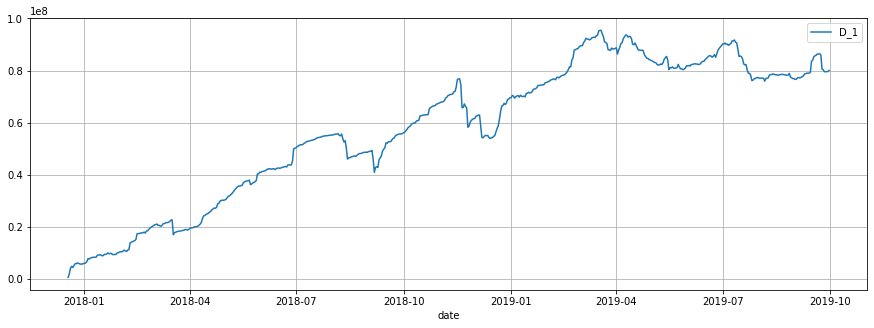

In [11]:
debt_price_df.plot(y = 'D_1', figsize=(15,5), grid=True)

In [12]:
debt_price_df.columns

Index(['rho_star(eth_price)', 'beta(stability_fee)', 'Q(eth_locked)', 'u_3',
       'b_2 + u_4', 'u_4', 'v', 'b_2', 'b_3', 'D_1'],
      dtype='object')

In [13]:
d2 = [0]
for i,r in debt_price_df.iterrows():
    if i==debt_price_df.index[0]:
        continue
    beta = r['beta(stability_fee)']
    delta_t = 1/365
    d_1 = r['D_1']
    d_2 = d2[-1]
    v = r['v']
    b_3 = r['b_3']
    new_d2 = d_2 + ((1+beta)**delta_t - 1) * (d_1 + d_2) - v - b_3
    d2.append(new_d2)
debt_price_df['D_2'] = d2
debt_price_df['D'] = debt_price_df['D_1'] + debt_price_df['D_2']
debt_price_df['C_star'] = debt_price_df['Q(eth_locked)'] * debt_price_df['rho_star(eth_price)']
debt_price_df['p_star'] = 1

# Debt Price Heuristic - option 1

Debt price: $\hat{p}$  
Define a "system level balance sheet" $V(\mathcal{X},\hat{p})$   
* $V(\mathcal{X},\hat{p}) = assets - liabilities$  
    * $assets = Q\rho^* + D_1\hat{p}$  
    * $liabilities = D_1\hat{p} + D_2\hat{p}$  
* $V(\mathcal{X},\hat{p}) = Q\rho^* + D_1\hat{p} - D_1\hat{p} - D_2\hat{p}$  
* $V(\mathcal{X},\hat{p}) = Q\rho^* - D_2\hat{p}$  

Let's assume $V_{t+1}=V_t$
* $Q_{t+1}\rho^*_{t+1} - D_{2;t+1}\hat{p}_{t+1} = Q_{t}\rho^*_{t} - D_{2;t}\hat{p}_{t}$

Solve for $\hat{p}_{t+1}$
* $D_{2;t+1}\hat{p}_{t+1} = Q_{t+1}\rho^*_{t+1} - Q_{t}\rho^*_{t} + D_{2;t}\hat{p}_{t}$
* $D_{2;t+1}\hat{p}_{t+1} = C^*_{t+1} - C^*_{t} + D_{2;t}\hat{p}_{t}$
* $\hat{p}_{t+1} = \frac{C^*_{t+1} - C^*_{t} + D_{2;t}\hat{p}_{t}}{D_{2;t+1}}$
* $\hat{p}_{t+1} = \frac{\Delta{C^*} + D_{2;t}\hat{p}_{t}}{D_{2;t+1}}$

Assume $\hat{p}_0 = p^*_0$

In [14]:
p_star_0 = debt_price_df.iloc[0]['p_star']
p_hat_0 = p_star_0
C_star_0 = debt_price_df.iloc[0]['C_star']
D_1_0 = debt_price_df.iloc[0]['D_1']
D_2_0 = debt_price_df.iloc[0]['D_2']

V = C_star_0 - D_2_0 * p_hat_0

V

1785297.1536313752

For practical purposes (we want to compute $\hat{p}$ using trivial pandas Series operations), let's reorganize the terms of the equations in a different way
* $Q_{t+1}\rho^*_{t+1} - D_{2;t+1}\hat{p}_{t+1} = V_0$
* $D_{2;t+1}\hat{p}_{t+1} = Q_{t+1}\rho^*_{t+1} - V_0$
* $\hat{p}_{t+1} = \frac{Q_{t+1}\rho^*_{t+1} - V_0}{D_{2;t+1}}$

In [15]:
C_star = debt_price_df['C_star']
D_2 = debt_price_df['D_2']

p_hat = (C_star - V) / D_2

debt_price_df['debt_price_option_1'] = p_hat

# Debt Price Heuristic

Debt price: $\hat{p}$  
Define a "system level balance sheet" $V(\mathcal{X},\hat{p})$   

$V(\mathcal{X},\hat{p})$   
* $V(\mathcal{X},\hat{p}) = assets - liabilities$  
    * $assets = Q\rho^* + D_1\hat{p}$  
    * $liabilities = D_1 p^* + D_2p^*$  
* $V(\mathcal{X},\hat{p}) = Q\rho^* + D_1 (\hat p - p^*) - D_2p^*$  

Let's assume $V_{t+1}=V_t$
$$Q_{t+1}\rho_{t+1}^* + D_{1; t+1} (\hat p_{t+1} - p_{t+1}^*) - D_{2:t+1}p^*_{t+1}= Q_t\rho^*_t + D_{1;t} (\hat p_t - p^*_t) - D_{2;t}p_t^*$$

$$\hat p_{t+1} = p^*_{t+1} + \frac{Q_tp_t^*-Q_{t+1}\rho_{t+1}^*+D_{2;t+1} p^*_{t}-D_{2;t} p^*_{t+1}+ D_{1; t+1} (\hat p_{t+1} - p_{t+1}^*)}{D_{1;t+1}}$$

Zargham's comment: while this turns out to be a bit more complex, one thing i like about it is that it results in a debt price described as a correction to the redemption price, which i think will help when we look to apply the model \[beyond\] the DAI system.

In [16]:
p_star_0 = debt_price_df.iloc[0]['p_star']
p_hat_0 = p_star_0
C_star_0 = debt_price_df.iloc[0]['C_star']
D_1_0 = debt_price_df.iloc[0]['D_1']
D_2_0 = debt_price_df.iloc[0]['D_2']

V = C_star_0 + D_1_0 * (p_hat_0 - p_star_0) - D_2_0 * p_hat_0
V

1785297.1536313752

For practical purposes (we want to compute $\hat{p}$ using trivial pandas Series operations), let's reorganize the terms of the equations in a different way
* $Q_{t+1}\rho_{t+1}^* + D_{1; t+1} (\hat p_{t+1} - p_{t+1}^*) - D_{2:t+1}p^*_{t+1}=V_0$
* $D_{1; t+1} (\hat p_{t+1} - p_{t+1}^*) = V_0 - Q_{t+1}\rho_{t+1}^* + D_{2:t+1}p^*_{t+1}$
* $\hat p_{t+1} - p_{t+1}^* = \frac{V_0 - Q_{t+1}\rho_{t+1}^* + D_{2:t+1}p^*_{t+1}}{D_{1; t+1}}$
* $\hat p_{t+1} = \frac{V_0 - Q_{t+1}\rho_{t+1}^* + D_{2:t+1}p^*_{t+1}}{D_{1; t+1}} + p_{t+1}^*$

In [17]:
p_star = debt_price_df['p_star']
C_star = debt_price_df['C_star']
D_1 = debt_price_df['D_1']
D_2 = debt_price_df['D_2']

p_hat = (V - C_star + D_2 * p_star) / D_1 + p_star

debt_price_df['debt_price_option_2'] = p_hat

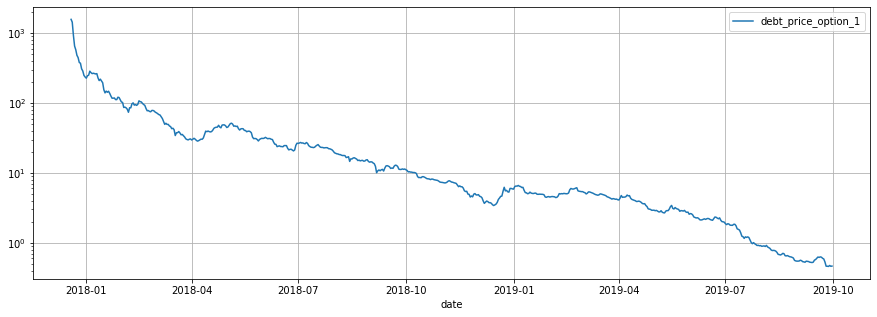

In [19]:
debt_price_df.plot(y='debt_price_option_1', logy=True, figsize=(15,5), grid=True)

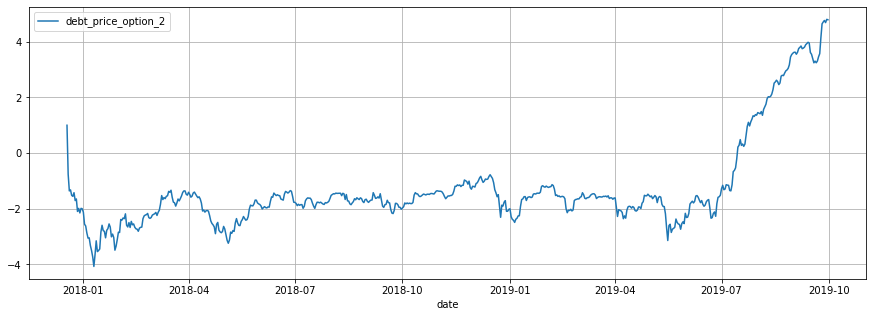

In [20]:
debt_price_df.plot(y='debt_price_option_2', figsize=(15,5), grid=True)

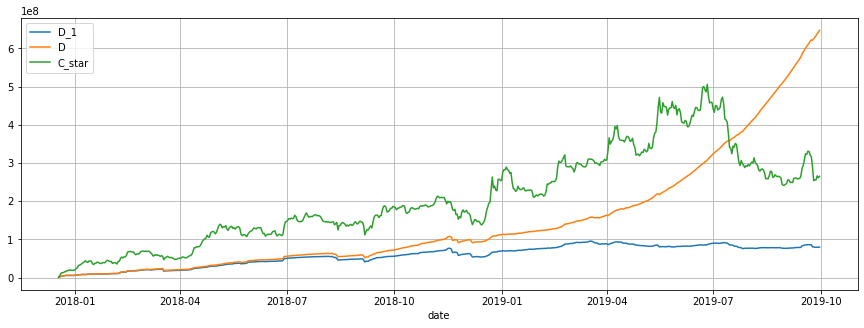

In [21]:
debt_price_df.plot(y = ['D_1','D','C_star'], figsize=(15,5), grid=True)